In [285]:
%matplotlib inline

Given Age and Gender, what is the distribution?

# Study Description

Initial exploration of dyslexia cohort

# Preprocessing

## Import software packages

If you don't have any of them, type the following into the terminal:
conda install pandas

In [286]:
import pandas as pd
import sklearn as skl
import numpy as np
import matplotlib.pyplot as plt

You'll have to replace mypath with the path to the excel spreadsheet on your computer

In [287]:
#mypath = '/Users/kesshijordan/Documents/Dyslexia/Copy of Dyslexia_children_TRIO_Whole.xlsx'

mypath = '/Users/kesshijordan/Documents/Dyslexia/Cohort_Info_New.xlsx'

Load the excel spreadsheet into the dataframe (df) using pandas

In [288]:
df = pd.read_excel(mypath)

In [1]:
#df.head()

In [290]:
#LEAVE THIS COMMENTED OUT SO PIDN's ARE HIDDEN
#df.head()

In [291]:
#list(df.columns)

In [292]:
volcols=[]
for i in list(df.columns):
    if i.find('VOL')>0:
        volcols.append(i)
volcols.append('Age')

In [293]:
volcols

['SLFip_L_VOL',
 'SLFip_R_VOL',
 'Arcuate_L_VOL',
 'Arcuate_R_VOL',
 'SLFtp_L_VOL',
 'SLFtp_R_VOL',
 'Aslant_L_VOL',
 'Aslant_R_VOL',
 'IFOF_L_VOL',
 'IFOF_R_VOL',
 'ILF_L_VOL',
 'ILF_R_VOL',
 'Uncinate_L_VOL',
 'Uncinate_R_VOL',
 'SLFip_L_VOL_NORM',
 'SLFip_R_VOL_NORM',
 'Arcuate_L_VOL_NORM',
 'Arcuate_R_VOL_NORM',
 'SLFtp_L_VOL_NORM',
 'SLFtp_R_VOL_NORM',
 'Aslant_L_VOL_NORM',
 'Aslant_R_VOL_NORM',
 'IFOF_L_VOL_NORM',
 'IFOF_R_VOL_NORM',
 'ILF_L_VOL_NORM',
 'ILF_R_VOL_NORM',
 'Uncinate_L_VOL_NORM',
 'Uncinate_R_VOL_NORM',
 'Age']

In [294]:
a=df.columns
print(a.contains('l'))
print(a[-30:])

False
Index(['middle temporal_L_LGI', 'EstimatedTotalIntraCranialVol', 'SLFip_L_VOL',
       'SLFip_R_VOL', 'Arcuate_L_VOL', 'Arcuate_R_VOL', 'SLFtp_L_VOL',
       'SLFtp_R_VOL', 'Aslant_L_VOL', 'Aslant_R_VOL', 'IFOF_L_VOL',
       'IFOF_R_VOL', 'ILF_L_VOL', 'ILF_R_VOL', 'Uncinate_L_VOL',
       'Uncinate_R_VOL', 'SLFip_L_VOL_NORM', 'SLFip_R_VOL_NORM',
       'Arcuate_L_VOL_NORM', 'Arcuate_R_VOL_NORM', 'SLFtp_L_VOL_NORM',
       'SLFtp_R_VOL_NORM', 'Aslant_L_VOL_NORM', 'Aslant_R_VOL_NORM',
       'IFOF_L_VOL_NORM', 'IFOF_R_VOL_NORM', 'ILF_L_VOL_NORM',
       'ILF_R_VOL_NORM', 'Uncinate_L_VOL_NORM', 'Uncinate_R_VOL_NORM'],
      dtype='object')


In [295]:
df['LI_ILF'] = 200*(df['ILF_L_VOL']-df['ILF_R_VOL'])/(df['ILF_L_VOL']+df['ILF_R_VOL'])
df['LI_ASL'] = 200*(df['Aslant_L_VOL']-df['Aslant_R_VOL'])/(df['Aslant_L_VOL']+df['Aslant_R_VOL'])
df['LI_ARC'] = 200*(df['Arcuate_L_VOL']-df['Arcuate_R_VOL'])/(df['Arcuate_L_VOL']+df['Arcuate_R_VOL'])
df['LI_SLFtp'] = 200*(df['SLFtp_L_VOL']-df['SLFtp_R_VOL'])/(df['SLFtp_L_VOL']+df['SLFtp_R_VOL'])
df['LI_SLFip'] = 200*(df['SLFip_L_VOL']-df['SLFip_R_VOL'])/(df['SLFip_L_VOL']+df['SLFip_R_VOL'])

You specify the features you want to use in the PCA

In [296]:
#features_of_interest = ['ILF_L_VOL', 'ILF_R_VOL', 'Aslant_L_VOL', 'Aslant_R_VOL', 'SLFtp_L_VOL', 'SLFtp_R_VOL','SLFip_L_VOL','SLFip_R_VOL']
#features_of_interest = ['ILF_L_VOL_NORM', 'ILF_R_VOL_NORM', 'Aslant_L_VOL_NORM', 'Aslant_R_VOL_NORM','Arcuate_L_VOL_NORM','Arcuate_R_VOL_NORM', 'SLFtp_L_VOL_NORM', 'SLFtp_R_VOL_NORM']

#features_of_interest = volcols
#features_of_interest = ['Arcuate_L_VOL','Arcuate_R_VOL', 'ILF_L_VOL', 'ILF_R_VOL']
#features_of_interest = ['LI_ILF','LI_SLFtp','LI_SLFip','LI_ARC','LI_ASL']

#features_of_interest = ['ILF_L FA', 'ILF_R FA', 'Aslant_L FA', 'Aslant_R FA','Arcuate_L FA', 'Arcuate_R FA', 'SLF-tp_L FA', 'SLF-tp_R FA','Age']
#features_of_interest = ['ILF_L_VOL', 'ILF_R_VOL', 'Aslant_L_VOL', 'Aslant_R_VOL','Arcuate_L_VOL','Arcuate_R_VOL', 'SLF-tp_L_VOL', 'SLF-tp_R_VOL', 'ILF_L FA', 'ILF_R FA', 'Aslant_L FA', 'Aslant_R FA','Arcuate_L FA','Arcuate_R FA', 'SLF-tp_L FA', 'SLF-tp_R FA','Age']

features_of_interest = ['SLFip_L_VOL',
 'SLFip_R_VOL',
 'Arcuate_L_VOL',
 'Arcuate_R_VOL',
 'SLFtp_L_VOL',
 'SLFtp_R_VOL',
 'Aslant_L_VOL',
 'Aslant_R_VOL',
 'IFOF_L_VOL',
 'IFOF_R_VOL',
 'ILF_L_VOL',
 'ILF_R_VOL',
 'Uncinate_L_VOL',
 'Uncinate_R_VOL']

## Drop any rows with missing features

In [297]:
print(df.shape)

(92, 139)


In [298]:
df = df.dropna(subset=features_of_interest)

In [299]:
print(df.shape)

(55, 139)


## Let's make the data a little nicer (code numbers and logopenic binary)

In [300]:
df['isdyslexic'] = (df['Group'] == 'Dys')*1
classification_names = ['NOTdys','dys']

In [301]:
classification_vector = df['isdyslexic']

In [302]:
df['Group'].value_counts()

Dys     36
Ctrl    19
Name: Group, dtype: int64

In [303]:
classification_names

['NOTdys', 'dys']

In [304]:
classification_vector.value_counts()

1    36
0    19
Name: isdyslexic, dtype: int64

In [305]:
cmapclass = plt.cm.get_cmap('rainbow', 2)
cmapnoclass = plt.cm.get_cmap('cool', 2)
myticks = [0,1]

print(classification_names)
print(classification_vector.value_counts())

['NOTdys', 'dys']
1    36
0    19
Name: isdyslexic, dtype: int64


In [306]:
myfeatures = df.loc[:,features_of_interest]
myfeature_names = myfeatures.columns
myfeature_names

Index(['SLFip_L_VOL', 'SLFip_R_VOL', 'Arcuate_L_VOL', 'Arcuate_R_VOL',
       'SLFtp_L_VOL', 'SLFtp_R_VOL', 'Aslant_L_VOL', 'Aslant_R_VOL',
       'IFOF_L_VOL', 'IFOF_R_VOL', 'ILF_L_VOL', 'ILF_R_VOL', 'Uncinate_L_VOL',
       'Uncinate_R_VOL'],
      dtype='object')

In [307]:
myfeatures.head()

,SLFip_L_VOL,SLFip_R_VOL,Arcuate_L_VOL,Arcuate_R_VOL,SLFtp_L_VOL,SLFtp_R_VOL,Aslant_L_VOL,Aslant_R_VOL,IFOF_L_VOL,IFOF_R_VOL,ILF_L_VOL,ILF_R_VOL,Uncinate_L_VOL,Uncinate_R_VOL
0,371.0,308.0,890.0,425.0,341.0,241.0,773.0,512.0,2561.0,1514.0,944.0,463.0,429.0,464.0
1,839.0,1149.0,1833.0,1758.0,1014.0,897.0,1224.0,1107.0,2752.0,2478.0,1547.0,1009.0,1176.0,1184.0
2,1207.0,1494.0,2417.0,1950.0,465.0,796.0,1286.0,942.0,3132.0,3187.0,1554.0,1257.0,842.0,536.0
3,1345.0,1208.0,1789.0,123.0,892.0,1209.0,1235.0,839.0,3946.0,3326.0,2227.0,1687.0,475.0,648.0
4,542.0,1146.0,1629.0,902.0,1053.0,998.0,943.0,732.0,2576.0,2142.0,1068.0,1018.0,909.0,709.0


In [308]:
myfeatures.head()

,SLFip_L_VOL,SLFip_R_VOL,Arcuate_L_VOL,Arcuate_R_VOL,SLFtp_L_VOL,SLFtp_R_VOL,Aslant_L_VOL,Aslant_R_VOL,IFOF_L_VOL,IFOF_R_VOL,ILF_L_VOL,ILF_R_VOL,Uncinate_L_VOL,Uncinate_R_VOL
0,371.0,308.0,890.0,425.0,341.0,241.0,773.0,512.0,2561.0,1514.0,944.0,463.0,429.0,464.0
1,839.0,1149.0,1833.0,1758.0,1014.0,897.0,1224.0,1107.0,2752.0,2478.0,1547.0,1009.0,1176.0,1184.0
2,1207.0,1494.0,2417.0,1950.0,465.0,796.0,1286.0,942.0,3132.0,3187.0,1554.0,1257.0,842.0,536.0
3,1345.0,1208.0,1789.0,123.0,892.0,1209.0,1235.0,839.0,3946.0,3326.0,2227.0,1687.0,475.0,648.0
4,542.0,1146.0,1629.0,902.0,1053.0,998.0,943.0,732.0,2576.0,2142.0,1068.0,1018.0,909.0,709.0


Remember: 0 is the first item (not dyslexic), 1 is the second (dyslexic)

In [309]:
classification_names

['NOTdys', 'dys']

In [310]:
X = np.array(myfeatures)
y = np.array(classification_vector)

Let's check the shape of our Feature matrix: there are 86 samples (patients) and 4 features

In [311]:
X.shape

(55, 14)

In [312]:
y.shape

(55,)

In [313]:
classification_names

['NOTdys', 'dys']

In [314]:
myfeature_names

Index(['SLFip_L_VOL', 'SLFip_R_VOL', 'Arcuate_L_VOL', 'Arcuate_R_VOL',
       'SLFtp_L_VOL', 'SLFtp_R_VOL', 'Aslant_L_VOL', 'Aslant_R_VOL',
       'IFOF_L_VOL', 'IFOF_R_VOL', 'ILF_L_VOL', 'ILF_R_VOL', 'Uncinate_L_VOL',
       'Uncinate_R_VOL'],
      dtype='object')

# Visualize Raw Features

Same as in the tutorial... change the x_index and y_index to plot different features against each other

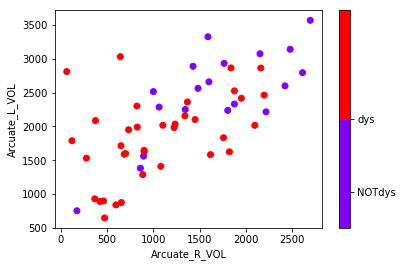

In [315]:
import numpy as np
import matplotlib.pyplot as plt

x_index = 3
y_index = 2

# this formatter will label the colorbar with the correct target names
formatter = plt.FuncFormatter(lambda i, *args: classification_names[int(i)])

plt.scatter(X[:, x_index], X[:, y_index],
            c=y, cmap=cmapclass)
plt.colorbar(ticks=myticks, format=formatter)
plt.clim(-0.5, 2.5)
plt.xlabel(myfeature_names[x_index])
plt.ylabel(myfeature_names[y_index]);

# Unsupervised Learning

## PCA

In [316]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
#pca = PCA(n_components=3)
pca.fit(X)
X_reduced = pca.transform(X)
print("Reduced dataset shape:", X_reduced.shape)

Reduced dataset shape: (55, 10)


In [317]:
df['PC1'] = X_reduced[:, 0]
df['PC2'] = X_reduced[:,1]

In [318]:
df.to_excel(mypath.replace('.xls','_pca.xls'))

### Plot the principal components against each other

check eval > 1

Meaning of the 10 components:
-0.246 x SLFip_L_VOL + -0.407 x SLFip_R_VOL + -0.479 x Arcuate_L_VOL + -0.363 x Arcuate_R_VOL + -0.114 x SLFtp_L_VOL + -0.099 x SLFtp_R_VOL + -0.114 x Aslant_L_VOL + -0.068 x Aslant_R_VOL + -0.373 x IFOF_L_VOL + -0.346 x IFOF_R_VOL + -0.194 x ILF_L_VOL + -0.249 x ILF_R_VOL + -0.098 x Uncinate_L_VOL + -0.067 x Uncinate_R_VOL
-0.135 x SLFip_L_VOL + -0.250 x SLFip_R_VOL + -0.243 x Arcuate_L_VOL + -0.436 x Arcuate_R_VOL + -0.031 x SLFtp_L_VOL + 0.041 x SLFtp_R_VOL + 0.057 x Aslant_L_VOL + -0.004 x Aslant_R_VOL + 0.719 x IFOF_L_VOL + 0.242 x IFOF_R_VOL + 0.288 x ILF_L_VOL + 0.015 x ILF_R_VOL + -0.055 x Uncinate_L_VOL + -0.042 x Uncinate_R_VOL
-0.356 x SLFip_L_VOL + -0.445 x SLFip_R_VOL + -0.080 x Arcuate_L_VOL + 0.568 x Arcuate_R_VOL + 0.146 x SLFtp_L_VOL + 0.105 x SLFtp_R_VOL + 0.255 x Aslant_L_VOL + 0.293 x Aslant_R_VOL + 0.063 x IFOF_L_VOL + -0.094 x IFOF_R_VOL + 0.038 x ILF_L_VOL + 0.235 x ILF_R_VOL + -0.305 x Uncinate_L_VOL + -0.033 x Uncinate_R_VOL
-0.193

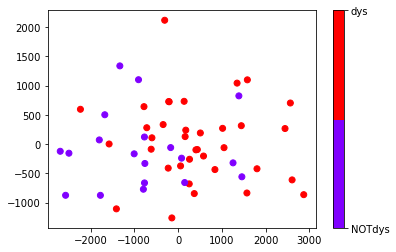

In [319]:
import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap=cmapclass)
plt.colorbar(ticks=myticks, format=formatter)

print("Meaning of the %i components:" % (X_reduced.shape[1]))
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            myfeature_names)))

Meaning of the 10 components:
-0.246 x SLFip_L_VOL + -0.407 x SLFip_R_VOL + -0.479 x Arcuate_L_VOL + -0.363 x Arcuate_R_VOL + -0.114 x SLFtp_L_VOL + -0.099 x SLFtp_R_VOL + -0.114 x Aslant_L_VOL + -0.068 x Aslant_R_VOL + -0.373 x IFOF_L_VOL + -0.346 x IFOF_R_VOL + -0.194 x ILF_L_VOL + -0.249 x ILF_R_VOL + -0.098 x Uncinate_L_VOL + -0.067 x Uncinate_R_VOL
-0.135 x SLFip_L_VOL + -0.250 x SLFip_R_VOL + -0.243 x Arcuate_L_VOL + -0.436 x Arcuate_R_VOL + -0.031 x SLFtp_L_VOL + 0.041 x SLFtp_R_VOL + 0.057 x Aslant_L_VOL + -0.004 x Aslant_R_VOL + 0.719 x IFOF_L_VOL + 0.242 x IFOF_R_VOL + 0.288 x ILF_L_VOL + 0.015 x ILF_R_VOL + -0.055 x Uncinate_L_VOL + -0.042 x Uncinate_R_VOL
-0.356 x SLFip_L_VOL + -0.445 x SLFip_R_VOL + -0.080 x Arcuate_L_VOL + 0.568 x Arcuate_R_VOL + 0.146 x SLFtp_L_VOL + 0.105 x SLFtp_R_VOL + 0.255 x Aslant_L_VOL + 0.293 x Aslant_R_VOL + 0.063 x IFOF_L_VOL + -0.094 x IFOF_R_VOL + 0.038 x ILF_L_VOL + 0.235 x ILF_R_VOL + -0.305 x Uncinate_L_VOL + -0.033 x Uncinate_R_VOL
-0.193

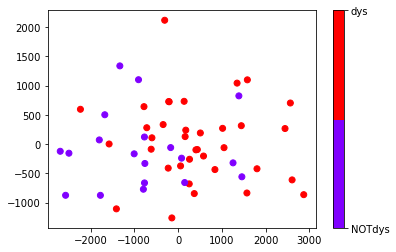

In [320]:
import pylab as plt
plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y,
           cmap=cmapclass)
plt.colorbar(ticks=myticks, format=formatter)

print("Meaning of the %i components:" % (X_reduced.shape[1]))
for component in pca.components_:
    print(" + ".join("%.3f x %s" % (value, name)
                     for value, name in zip(component,
                                            myfeature_names)))


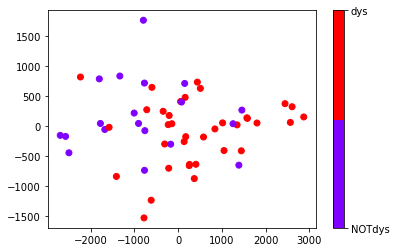

In [321]:
plt.scatter(X_reduced[:, 0], X_reduced[:, 2], c=y,
           cmap=cmapclass)
plt.colorbar(ticks=myticks, format=formatter)

In [322]:
import plotly.plotly as py
from plotly.graph_objs import *
import plotly.tools as tls

In [323]:
from plotly import __version__
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

print(__version__) # requires version >= 1.9.0
init_notebook_mode(connected=True)

2.0.11


## Now with scaling

Automatically created module for IPython interactive environment

Prediction accuracy for the normal test dataset with PCA
66.67%


Prediction accuracy for the standardized test dataset with PCA
66.67%


PC 1 without scaling:
 [-0.23146994 -0.41182439 -0.48158378 -0.35538906 -0.08877502 -0.11169313
 -0.09811103 -0.06221237 -0.37500473 -0.36026482 -0.20799308 -0.23560226
 -0.10598255 -0.06576003]

PC 1 with scaling:
 [-0.2811103  -0.31750259 -0.37443009 -0.27224486 -0.18901235 -0.2428435
 -0.23456631 -0.16398282 -0.27895414 -0.33071111 -0.29327914 -0.30884214
 -0.17214971 -0.17614399]


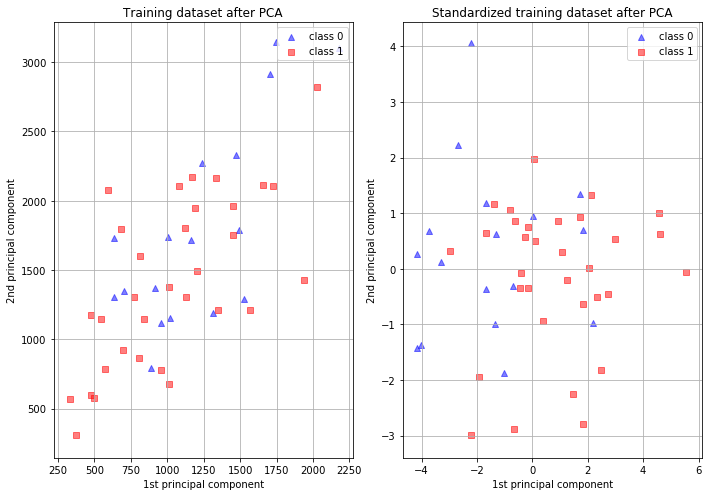

In [324]:
from __future__ import print_function
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import GaussianNB
from sklearn import metrics
import matplotlib.pyplot as plt
from sklearn.pipeline import make_pipeline
print(__doc__)

# Code source: Tyler Lanigan <tylerlanigan@gmail.com>
#              Sebastian Raschka <mail@sebastianraschka.com>

# License: BSD 3 clause

RANDOM_STATE = 42
FIG_SIZE = (10, 7)


features=X
target=y

# Make a train/test split using 30% test size
X_train, X_test, y_train, y_test = train_test_split(features, target,
                                                    test_size=0.10,
                                                    random_state=RANDOM_STATE)

# Fit to data and predict using pipelined GNB and PCA.
unscaled_clf = make_pipeline(PCA(n_components=2), GaussianNB())
unscaled_clf.fit(X_train, y_train)
pred_test = unscaled_clf.predict(X_test)

# Fit to data and predict using pipelined scaling, GNB and PCA.
std_clf = make_pipeline(StandardScaler(), PCA(n_components=2), GaussianNB())
std_clf.fit(X_train, y_train)
pred_test_std = std_clf.predict(X_test)

# Show prediction accuracies in scaled and unscaled data.
print('\nPrediction accuracy for the normal test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test)))

print('\nPrediction accuracy for the standardized test dataset with PCA')
print('{:.2%}\n'.format(metrics.accuracy_score(y_test, pred_test_std)))

# Extract PCA from pipeline
pca = unscaled_clf.named_steps['pca']
pca_std = std_clf.named_steps['pca']

# Show first principal componenets
print('\nPC 1 without scaling:\n', pca.components_[0])
print('\nPC 1 with scaling:\n', pca_std.components_[0])

# Scale and use PCA on X_train data for visualization.
scaler = std_clf.named_steps['standardscaler']
X_train_std = pca_std.transform(scaler.transform(X_train))

# visualize standardized vs. untouched dataset with PCA performed
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=FIG_SIZE)


for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's', 'o')):
    ax1.scatter(X_train[y_train == l, 0], X_train[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

for l, c, m in zip(range(0, 2), ('blue', 'red'), ('^', 's', 'o')):
    ax2.scatter(X_train_std[y_train == l, 0], X_train_std[y_train == l, 1],
                color=c,
                label='class %s' % l,
                alpha=0.5,
                marker=m
                )

ax1.set_title('Training dataset after PCA')
ax2.set_title('Standardized training dataset after PCA')

for ax in (ax1, ax2):
    ax.set_xlabel('1st principal component')
    ax.set_ylabel('2nd principal component')
    ax.legend(loc='upper right')
    ax.grid()

plt.tight_layout()

plt.show()

## KMeans Clustering

This plot is pc1 vs pc2 labeled by our y_pred vector, which is the cluster membership derived from the data... try changing n_clusters (2 and 3 are interesting)

In [325]:
from sklearn.cluster import KMeans
k_means = KMeans(n_clusters=2, random_state=0) # Fixing the RNG in kmeans
k_means.fit(X)
y_pred = k_means.predict(X)

In [326]:
pc1 = X_reduced[:, 0]
pc2 = X_reduced[:, 1]

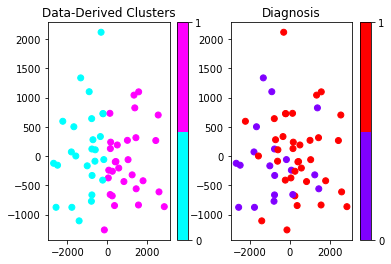

In [327]:
plt.subplot(1,2,1)
plt.scatter(pc1, pc2, c=y_pred,
           cmap=cmapnoclass);
plt.colorbar(ticks=myticks)
plt.title('Data-Derived Clusters')
plt.subplot(1,2,2)
plt.scatter(pc1, pc2, c=y,
           cmap=cmapclass);
plt.colorbar(ticks=myticks)
plt.title('Diagnosis')

# Supervised Learning

In [328]:
from sklearn.metrics import confusion_matrix, accuracy_score

## SVC

In [329]:
def plot_svc_decision_function(clf, ax=None):
    """Plot the decision function for a 2D SVC"""
    if ax is None:
        ax = plt.gca()
    x = np.linspace(plt.xlim()[0], plt.xlim()[1], 30)
    y = np.linspace(plt.ylim()[0], plt.ylim()[1], 30)
    Y, X = np.meshgrid(y, x)
    P = np.zeros_like(X)
    for i, xi in enumerate(x):
        for j, yj in enumerate(y):
            P[i, j] = clf.decision_function([[xi, yj]])
    # plot the margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])

In [330]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

In [331]:
def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    return out

In [332]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    #plt.ylabel('True label')
    #plt.xlabel('Predicted label')

### PCA + SVC (2 Dimensional)

Now we are going to try a support vector classifier (simplest supervised)

In [333]:
Xpc = np.column_stack([pc1,pc2])

### SVC Using the PC's

In [334]:
from sklearn.svm import SVC  # "Support Vector Classifier"
clf_svc_pc = SVC(kernel='linear')
clf_svc_pc.fit(Xpc, y)
result_svc_pc = clf_svc_pc.predict(Xpc)

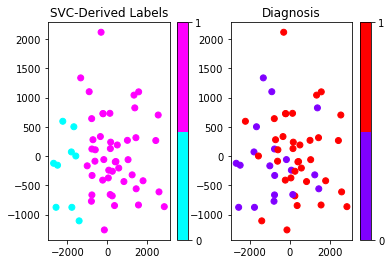

In [335]:
plt.subplot(1,2,1)
plt.scatter(pc1, pc2, c=result_svc_pc,
           cmap=cmapnoclass);
plt.colorbar(ticks=myticks)
plt.title('SVC-Derived Labels')
plt.subplot(1,2,2)
plt.scatter(pc1, pc2, c=y,
           cmap=cmapclass);
plt.colorbar(ticks=myticks)
plt.title('Diagnosis')

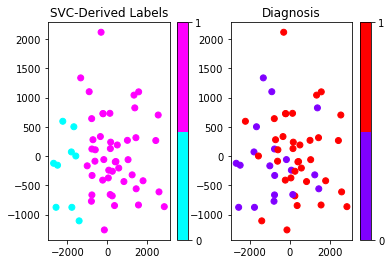

In [336]:
plt.subplot(1,2,1)
plt.scatter(pc1, pc2, c=result_svc_pc,
           cmap=cmapnoclass);
plt.colorbar(ticks=myticks)
plt.title('SVC-Derived Labels')
plt.subplot(1,2,2)
plt.scatter(pc1, pc2, c=y,
           cmap=cmapclass);
plt.colorbar(ticks=myticks)
plt.title('Diagnosis')

X0, X1 = Xpc[:, 0], Xpc[:, 1]
xx, yy = make_meshgrid(X0, X1)
fig = plt.figure()
ax = fig.add_subplot(111) 
plot_contours(ax,clf_svc_pc, xx, yy,
                  cmap=plt.cm.rainbow, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.rainbow, s=20, edgecolors='k')

Confusion matrix, without normalization
Accuracy: 0.709091


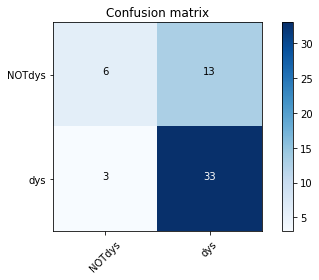

In [337]:
cmtrx = confusion_matrix(y, result_svc_pc)
plot_confusion_matrix(cmtrx, classes=classification_names,
                      title='Confusion matrix')
ascore = accuracy_score(y, result_svc_pc)
print("Accuracy: %f" % (ascore))

In [338]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf_svc_pc, X, y, cv=5)
print(scores)  
print("Accuracy: %0.2f (95CI+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.41666667 0.90909091 0.45454545 0.63636364 0.9       ]
Accuracy: 0.66 (95CI+/- 0.42)


### SVC Using all features

In [339]:
clf = SVC(kernel='linear')
clf.fit(X, y)
result_svc = clf.predict(X)

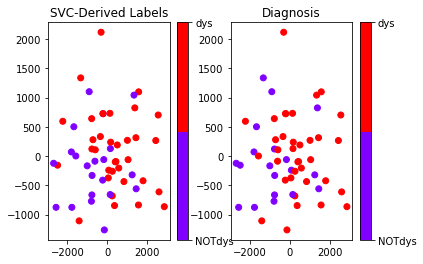

In [340]:
plt.subplot(1,2,1)
plt.scatter(pc1, pc2, c=result_svc, cmap=cmapclass)
plt.title('SVC-Derived Labels')
plt.colorbar(ticks=myticks, format=formatter)
plt.subplot(1,2,2)
plt.scatter(pc1, pc2, c=y, cmap=cmapclass)
plt.title('Diagnosis')
plt.colorbar(ticks=myticks, format=formatter)

Confusion matrix, without normalization
Accuracy: 0.781818


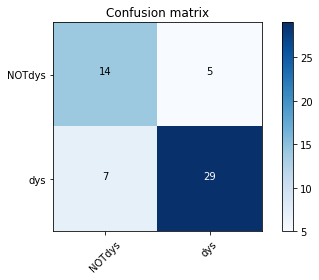

In [341]:
cmtrx = confusion_matrix(y, result_svc)
plot_confusion_matrix(cmtrx, classes=classification_names,
                      title='Confusion matrix')
ascore = accuracy_score(y, result_svc)
print("Accuracy: %f" % (ascore))

In [342]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(clf, X, y, cv=5)
print(scores)  
print("Accuracy: %0.2f (95CI+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.41666667 0.90909091 0.45454545 0.63636364 0.9       ]
Accuracy: 0.66 (95CI+/- 0.42)


## KNN (K-Nearest Neighbors)... Remember OVERFITTING CONCERNS

### Let's try this in 2D with PC1 and PC2

In [343]:
from sklearn import neighbors
# create the model
knn_pc = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn_pc.fit(Xpc, y)

#predict the result
result_knn_pc = knn_pc.predict(Xpc)

X0, X1 = Xpc[:, 0], Xpc[:, 1]
xx, yy = make_meshgrid(X0, X1)
fig = plt.figure()
ax = fig.add_subplot(111) 
plot_contours(ax,knn_pc, xx, yy,
                  cmap=plt.cm.rainbow, alpha=0.8)
ax.scatter(X0, X1, c=y, cmap=plt.cm.rainbow, s=20, edgecolors='k')

Confusion matrix, without normalization
Accuracy: 0.781818


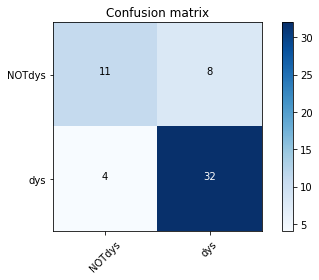

In [344]:
cmtrx = confusion_matrix(y, result_knn_pc)
plot_confusion_matrix(cmtrx, classes=classification_names,
                      title='Confusion matrix')
ascore = accuracy_score(y, result_knn_pc)
print("Accuracy: %f" % (ascore))

### Now with all of the features

In [345]:
from sklearn import neighbors
# create the model
knn = neighbors.KNeighborsClassifier(n_neighbors=5)

# fit the model
knn.fit(X, y)

#predict the result
result_knn = knn.predict(X)

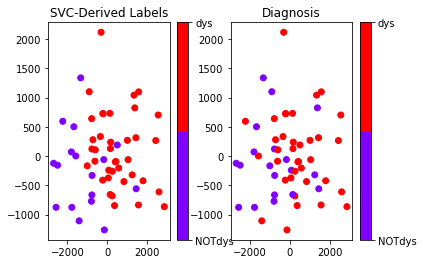

In [346]:
plt.subplot(1,2,1)
plt.scatter(pc1, pc2, c=result_knn, cmap=cmapclass)
plt.title('SVC-Derived Labels')
plt.colorbar(ticks=myticks, format=formatter)
plt.subplot(1,2,2)
plt.scatter(pc1, pc2, c=y, cmap=cmapclass)
plt.title('Diagnosis')
plt.colorbar(ticks=myticks, format=formatter)

Confusion matrix, without normalization
Accuracy: 0.781818


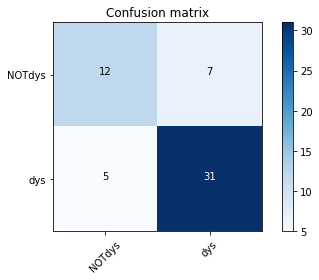

In [347]:
cmtrx = confusion_matrix(y, result_knn)
plot_confusion_matrix(cmtrx, classes=classification_names,
                      title='Confusion matrix')
ascore = accuracy_score(y, result_knn)
print("Accuracy: %f" % (ascore))

In [348]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(knn, X, y, cv=5)
print(scores)  
print("Accuracy: %0.2f (95CI+/- %0.2f)" % (scores.mean(), scores.std() * 2))

[0.66666667 0.81818182 0.54545455 0.54545455 0.6       ]
Accuracy: 0.64 (95CI+/- 0.20)


In [349]:
metric_list = ['rap pic name','coding','digits fwd','digits back','phonemic flu','mem words','TOWREswe','TOWREpde']

metricpc = metric_list+['PC1','PC2', 'LI_ARC']

In [350]:
df2 = df[metricpc]

In [351]:
print(df2.shape)

(55, 11)


In [352]:
df2 = df2.dropna()

In [353]:
print(df2.shape)

(18, 11)


In [354]:
df2.columns

Index(['rap pic name', 'coding', 'digits fwd', 'digits back', 'phonemic flu',
       'mem words', 'TOWREswe', 'TOWREpde', 'PC1', 'PC2', 'LI_ARC'],
      dtype='object')

In [355]:
import seaborn as sns

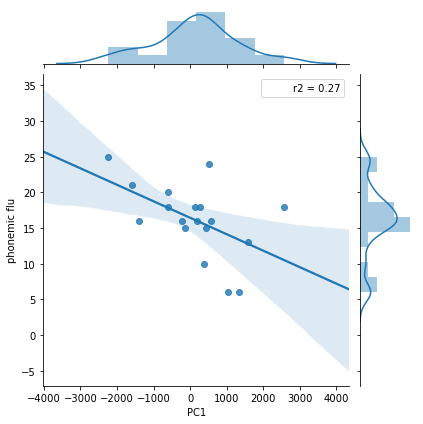

In [356]:
from scipy import stats
def r2(x, y):
    return stats.pearsonr(x, y)[0] ** 2

sns.jointplot('PC1','phonemic flu', data=df2, kind="reg", stat_func=r2)

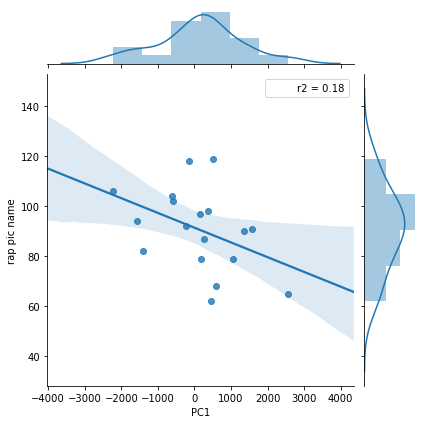

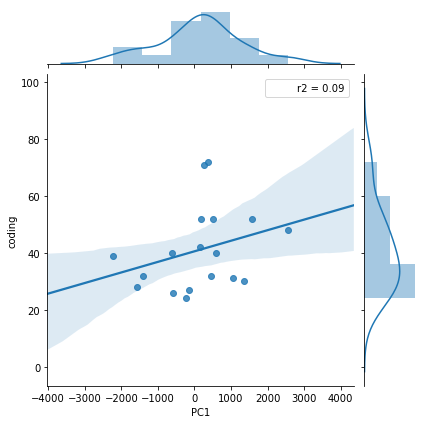

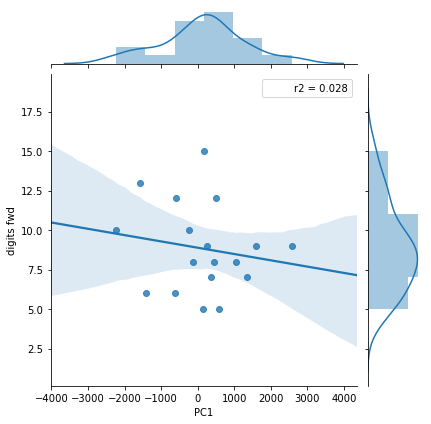

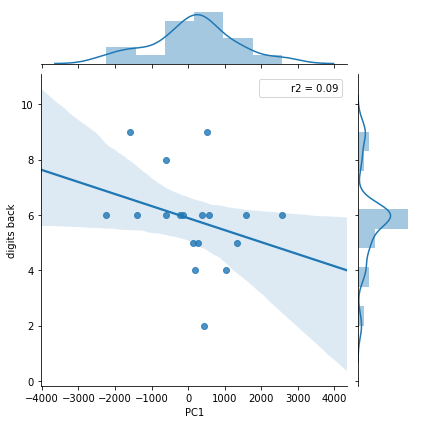

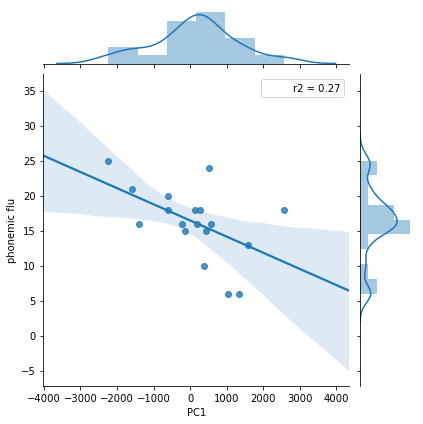

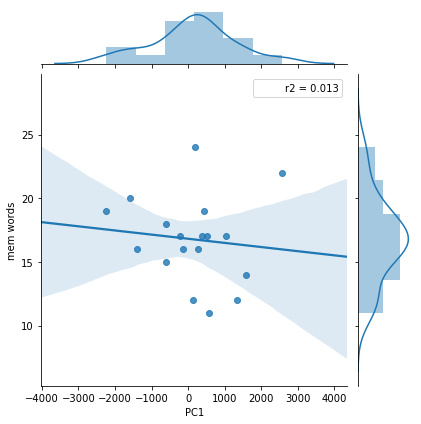

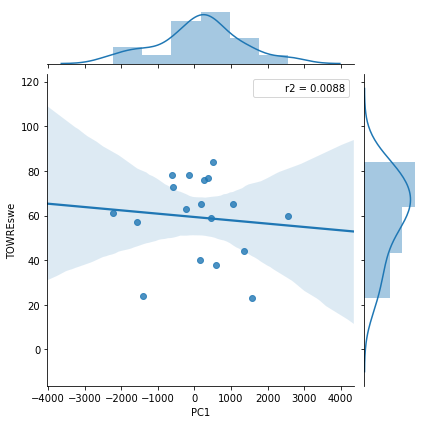

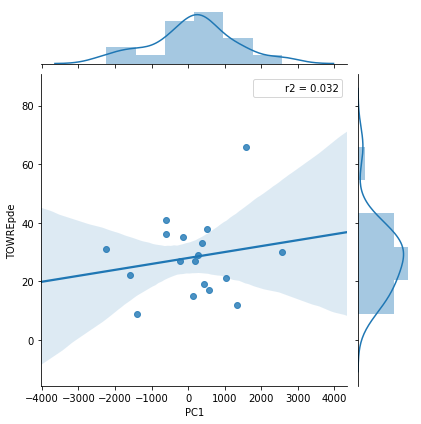

In [357]:
for met in metric_list:
    sns.jointplot('PC1',met, data=df2, kind="reg", stat_func=r2)

(21, 2)
(22, 2)
(22, 2)
(22, 2)
(22, 2)
(20, 2)
(21, 2)
(21, 2)


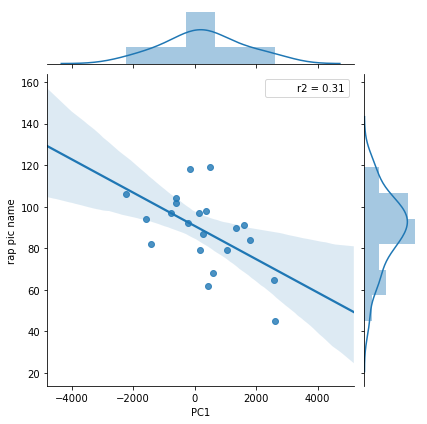

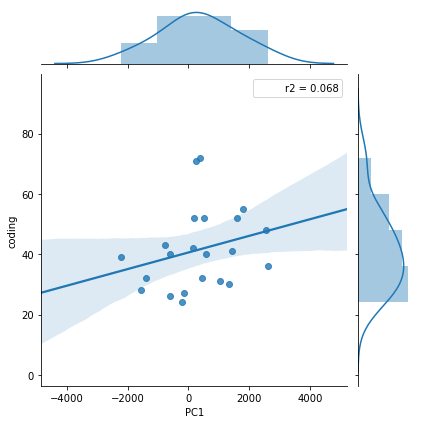

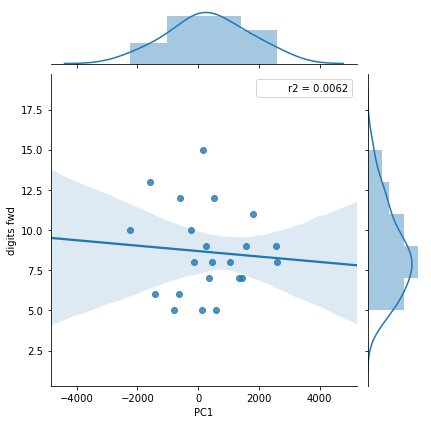

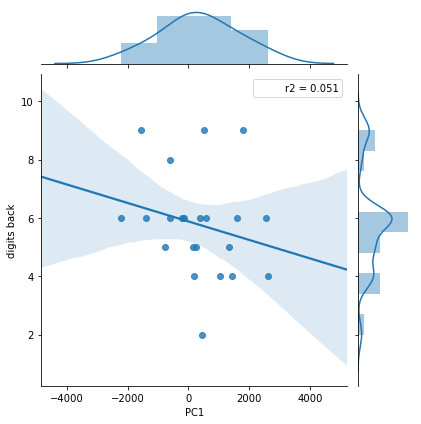

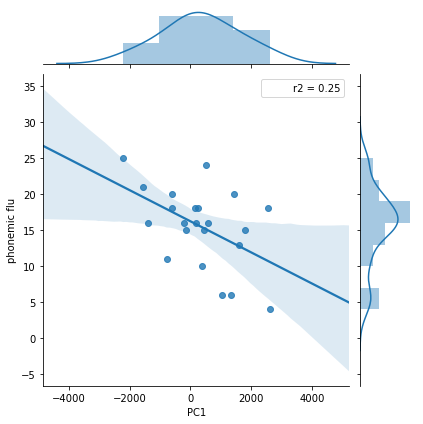

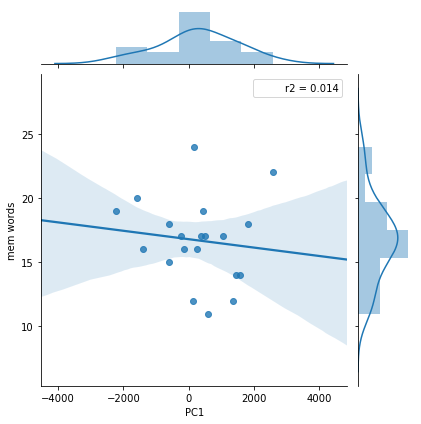

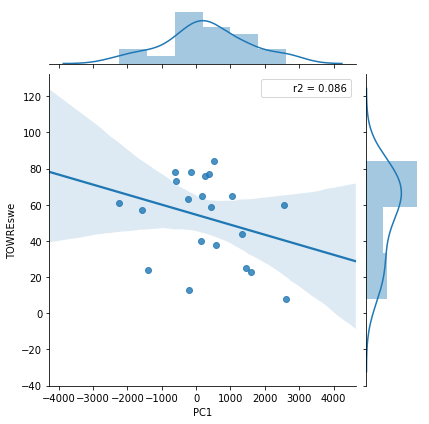

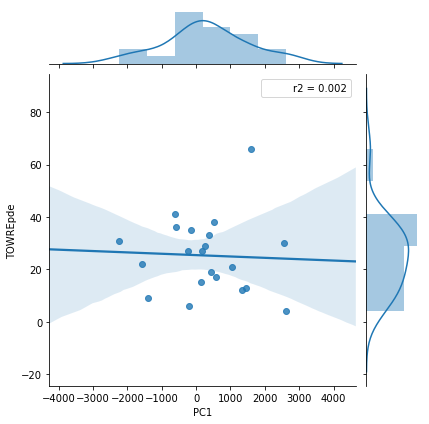

In [358]:
for met in metric_list:
    dfmet_temp= df[['PC1',met]]
    dfmet_temp = dfmet_temp.dropna()
    print(dfmet_temp.shape)
    sns.jointplot('PC1',met, data=dfmet_temp, kind="reg", stat_func=r2)

Correlations between matrices (do volume and DTI metrics mean the same thing?)
- Virginia's data (TRIO and Prisma)
- % of track volume vs hemispheric white matter
- include ILF?
- Dyslexia